In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder

# Understanding Data

In [144]:
Data = pd.read_csv("Data.csv")
Data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [145]:
Data.drop(["property_id","location_id", "page_url", "province_name", "area", "date_added", "agency", "agent", "Area Category", "location"], inplace=True, axis=1)

In [146]:
Data.head()

,property_type,price,city,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,Flat,10000000,Islamabad,33.679890,73.012640,2,For Sale,2,Marla,4.0
1,Flat,6900000,Islamabad,33.700993,72.971492,3,For Sale,3,Marla,5.6
2,House,16500000,Islamabad,33.631486,72.926559,6,For Sale,5,Marla,8.0
3,House,43500000,Islamabad,33.707573,73.151199,4,For Sale,4,Kanal,2.0
4,House,7000000,Islamabad,33.492591,73.301339,3,For Sale,3,Marla,8.0


In [147]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   city           168446 non-null  object 
 3   latitude       168446 non-null  float64
 4   longitude      168446 non-null  float64
 5   baths          168446 non-null  int64  
 6   purpose        168446 non-null  object 
 7   bedrooms       168446 non-null  int64  
 8   Area Type      168446 non-null  object 
 9   Area Size      168446 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 12.9+ MB


In [148]:
Data.describe()

,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [149]:
train_set, test_set = train_test_split(Data, train_size=0.2, random_state=42)

In [150]:
test_set['city'].value_counts()/len(test_set)

city
Karachi       0.358757
Lahore        0.246258
Islamabad     0.222601
Rawalpindi    0.124394
Faisalabad    0.047990
Name: count, dtype: float64

In [151]:
Data['city'].value_counts()/len(Data)

city
Karachi       0.359071
Lahore        0.245936
Islamabad     0.222184
Rawalpindi    0.124527
Faisalabad    0.048283
Name: count, dtype: float64

In [152]:
len(Data)

168446

In [153]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   city           168446 non-null  object 
 3   latitude       168446 non-null  float64
 4   longitude      168446 non-null  float64
 5   baths          168446 non-null  int64  
 6   purpose        168446 non-null  object 
 7   bedrooms       168446 non-null  int64  
 8   Area Type      168446 non-null  object 
 9   Area Size      168446 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 12.9+ MB


In [154]:
Data['Area_Size_Marla'] = Data.apply(
    lambda row: row['Area Size'] * 20 if row['Area Type'] == 'Kanal' else row['Area Size'],
    axis=1
)

# Visualizing Data

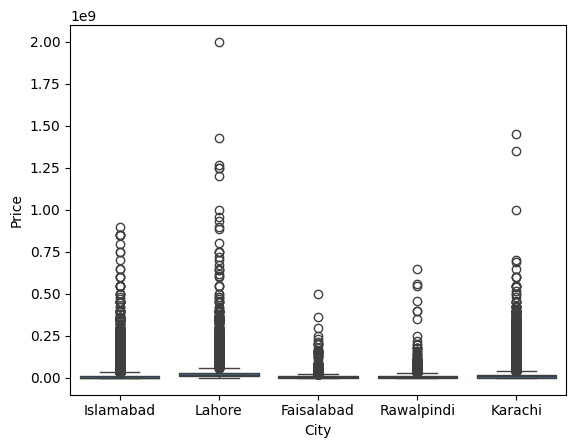

In [155]:
sns.boxplot(data=Data,x="city", y="price")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

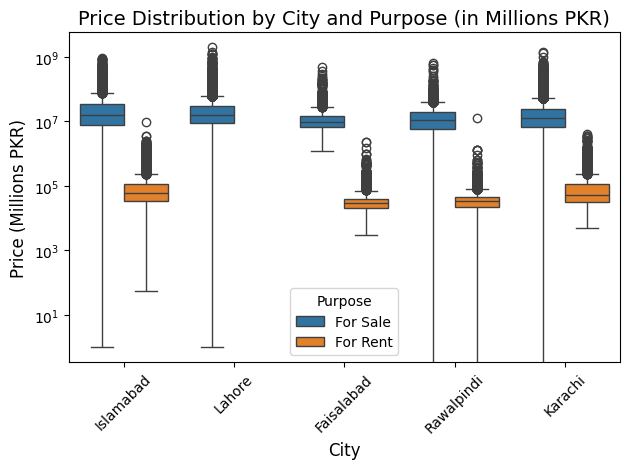

In [156]:
sns.boxplot(x='city', y='price', hue='purpose', data=Data)
plt.title('Price Distribution by City and Purpose (in Millions PKR)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Price (Millions PKR)', fontsize=12)
plt.yscale('log')  # Log scale to handle wide price range
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.tight_layout()
plt.show()

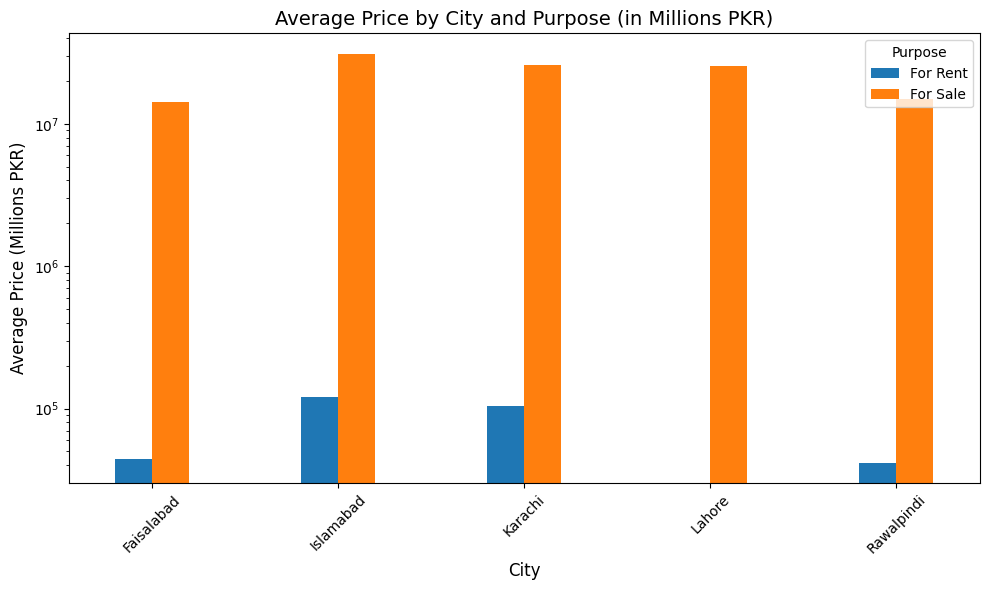

In [159]:
avg_price = Data.groupby(['city', 'purpose'])['price'].mean().unstack()
avg_price.plot(kind='bar', figsize=(10, 6), width=0.4)
plt.title('Average Price by City and Purpose (in Millions PKR)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price (Millions PKR)', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.tight_layout()
plt.show()

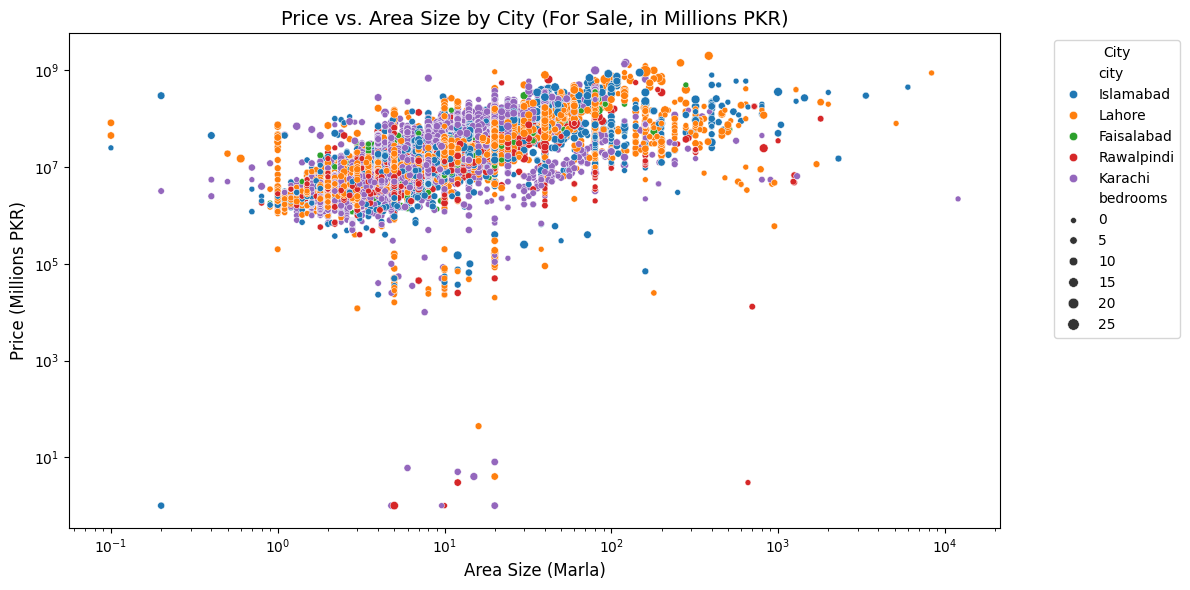

In [161]:
sale_df = Data[Data['purpose'] == 'For Sale']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_Size_Marla', y='price', hue='city', size='bedrooms', data=sale_df)
plt.title('Price vs. Area Size by City (For Sale, in Millions PKR)', fontsize=14)
plt.xlabel('Area Size (Marla)', fontsize=12)
plt.ylabel('Price (Millions PKR)', fontsize=12)
plt.yscale('log')  # Log scale for price
plt.xscale('log')  # Log scale for area to handle wide range
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [162]:
numerical_cols = ['price', 'bedrooms', 'baths', 'Area_Size_Marla']

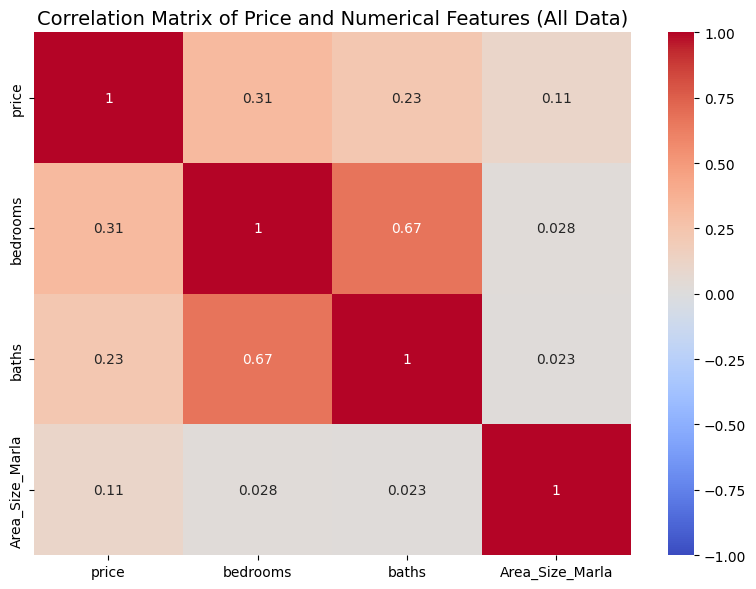

In [164]:
plt.figure(figsize=(8, 6))
corr_matrix = Data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Price and Numerical Features (All Data)', fontsize=14)
plt.tight_layout()
plt.show()

# Preparing Data

In [165]:
Test_Y = test_set['price']
Test_X = test_set.drop('price', axis=1)

In [166]:
Test_Y.head()

49309    87500000
42561       55000
1398     21800000
81279     6500000
18347       75000
Name: price, dtype: int64

In [167]:
Test_X

,property_type,city,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
49309,House,Karachi,24.805045,67.064323,6,For Sale,6,Kanal,1.0
42561,House,Karachi,24.935635,67.051020,3,For Rent,3,Marla,9.3
1398,House,Lahore,31.537605,74.419000,5,For Sale,4,Marla,10.0
81279,House,Rawalpindi,33.640455,73.084095,0,For Sale,4,Marla,2.0
18347,House,Islamabad,33.701636,72.948532,6,For Rent,7,Marla,10.0
...,...,...,...,...,...,...,...,...,...
33792,House,Rawalpindi,33.637390,73.076675,0,For Sale,0,Marla,10.1
150486,House,Karachi,24.903368,67.048850,2,For Sale,3,Marla,3.6
40126,House,Lahore,31.495909,74.350569,5,For Sale,5,Kanal,1.0
76993,House,Rawalpindi,33.501360,73.108691,2,For Rent,2,Marla,5.0


In [173]:
encoder = OrdinalEncoder() 
encoded = encoder.fit_transform(train_set[["city"]])

In [178]:
encoder.categories_

[array(['Faisalabad', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi'],
       dtype=object)]